In [ ]:
import pandas as pd


In [49]:
#Import the necessary libraries
import pandas as pd # Loading dataset
import numpy as np #Perform numerical calculations
import matplotlib.pyplot as plt #Python visualizations
import seaborn as sns #Statistical visualizations
from scipy import stats #Statistical inferencing
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking for multicollinearity
from statsmodels.tools.tools import add_constant #Adding y-intercept to our model
from statsmodels.formula.api import ols #Linear Regression
import statsmodels.api as sm #ANOVA/ F-Statistic
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #Preprocessing data before ML
from sklearn.model_selection import train_test_split, GridSearchCV #split our data, get the best model parameters
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Linear Regression
from sklearn.tree import DecisionTreeRegressor #Tree model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor #Ensembling model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score #Model evaluators
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# Correct imports - note the capitalization
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('../data/processed/crypto_data_features_labels.csv')
data.head() 

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return,label,label_name
0,2023-09-12,25162.53,26567.00,25131.48,25840.10,56434.38537,2023-09-12 23:59:59.999,1.464393e+09,1047056,27720.51830,...,-512.111919,26068.5745,27576.7890,27630.36120,27129.522592,25007.626408,32.748983,0.014779,1,HOLD
1,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,-448.682032,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469,1,HOLD
2,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,-369.883209,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913,1,HOLD
3,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,-297.767058,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516,1,HOLD
4,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,-241.089650,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211,1,HOLD


In [ ]:
data.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'num_trades', 'taker_base_volume',
       'taker_quote_volume', '1_day_return', '7_day_volatility',
       '1_day_volatility', 'rsi', 'macd', 'sma20', 'sma50', 'sma200',
       'bb_high', 'bb_low', 'stochastic_oscillator', 'future_return', 'label',
       'label_name'],
      dtype='object')

In [51]:
# name X and y features and labels
X = data.drop(columns=['label','open_time','label_name','close_time'],axis=1)
y = data['label']

In [52]:
X.head()

,open,high,low,close,volume,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume,1_day_return,...,1_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return
0,25162.53,26567.00,25131.48,25840.10,56434.38537,1.464393e+09,1047056,27720.51830,7.191473e+08,0.026928,...,0.019610,42.780295,-512.111919,26068.5745,27576.7890,27630.36120,27129.522592,25007.626408,32.748983,0.014779
1,25840.10,26405.22,25764.17,26222.00,31610.82753,8.254379e+08,714880,15287.00038,3.990998e+08,0.014779,...,0.019838,47.503163,-448.682032,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469
2,26222.00,26860.49,26126.77,26522.73,38333.17250,1.015267e+09,799278,19440.45467,5.148638e+08,0.011469,...,0.019959,50.937343,-369.883209,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913
3,26522.73,26888.00,26224.00,26600.00,26227.29369,6.952033e+08,654094,12600.39115,3.340459e+08,0.002913,...,0.019949,51.809649,-297.767058,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516
4,26599.99,26777.00,26445.00,26559.67,13960.93351,3.708899e+08,526416,6508.91352,1.729268e+08,-0.001516,...,0.019748,51.297010,-241.089650,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3927
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 21
[LightGBM] [Info] Start training from score -1.862029
[LightGBM] [Info] Start training from score -0.444614
[LightGBM] [Info] Start training from score -1.591738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

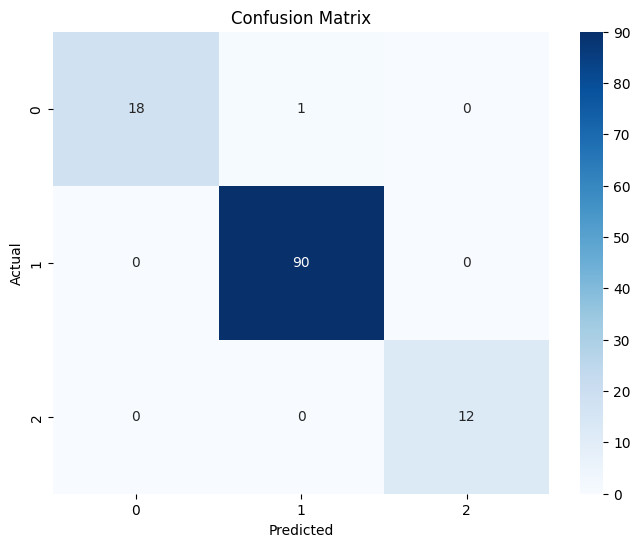

In [55]:
#Use: - 70% training - 15% validation - 15% test\
#**No shuffling** because cryptocurrency is time-series data
train_size = 0.7
val_size = 0.15
test_size = 0.15
train_end = int(len(X) * train_size)
val_end = int(len(X) * (train_size + val_size))
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]  
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()